Thực hành sử dụng Random Forest để phân loại hoa trong tệp IRIS.csv

In [6]:
import numpy as np
import matplotlib.pyplot as plt   
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
flower_dataset=pd.read_csv('IRIS.csv')

print("Number of rows and columns: ",flower_dataset.shape)
print("First 5 rows of dataset:\n ",flower_dataset.head())
print("Views about their sums of instances and their type:\n",flower_dataset.info())
print("Missing values: ",flower_dataset.isnull().sum())

Number of rows and columns:  (150, 5)
First 5 rows of dataset:
     sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Views about their sums of instances and their type:
 None
Missin

Preprocessing(Labeling Data)

In [11]:
label_encoder=preprocessing.LabelEncoder()
flower_dataset['species']=label_encoder.fit_transform(flower_dataset['species'])
flower_dataset.head(-4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
141,6.9,3.1,5.1,2.3,2
142,5.8,2.7,5.1,1.9,2
143,6.8,3.2,5.9,2.3,2
144,6.7,3.3,5.7,2.5,2


More Overview with Description and Visualization

In [18]:
print(flower_dataset.describe())

       sepal_length  sepal_width  petal_length  petal_width     species
count    150.000000   150.000000    150.000000   150.000000  150.000000
mean       5.843333     3.054000      3.758667     1.198667    1.000000
std        0.828066     0.433594      1.764420     0.763161    0.819232
min        4.300000     2.000000      1.000000     0.100000    0.000000
25%        5.100000     2.800000      1.600000     0.300000    0.000000
50%        5.800000     3.000000      4.350000     1.300000    1.000000
75%        6.400000     3.300000      5.100000     1.800000    2.000000
max        7.900000     4.400000      6.900000     2.500000    2.000000


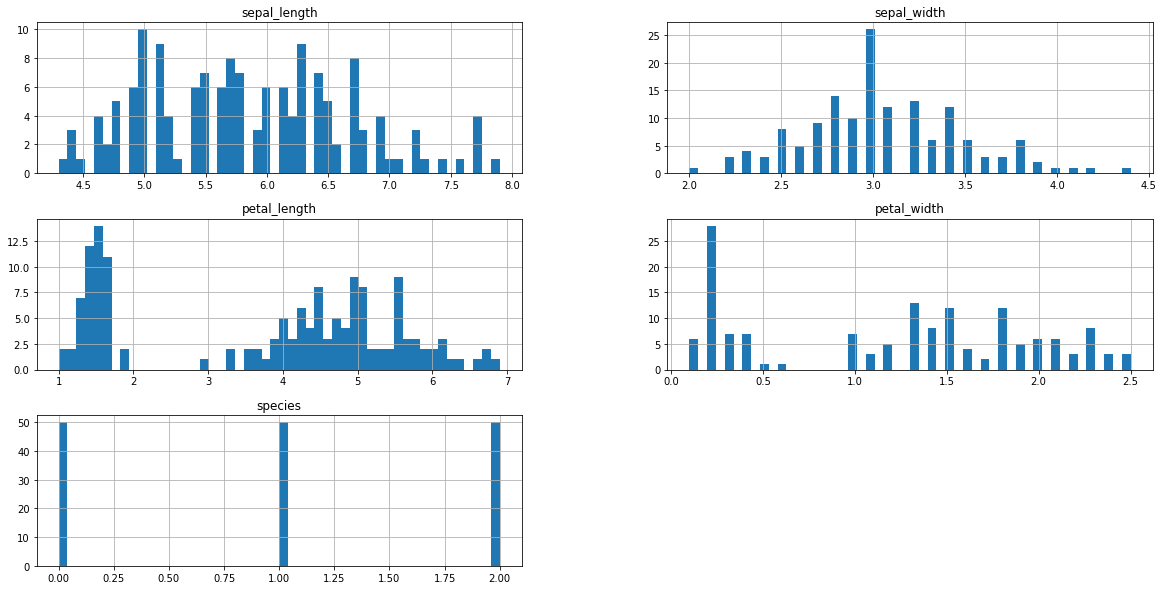

In [12]:
flower_dataset.hist(bins= 50, figsize=(20,10))
plt.show()

<AxesSubplot:xlabel='sepal_width', ylabel='species'>

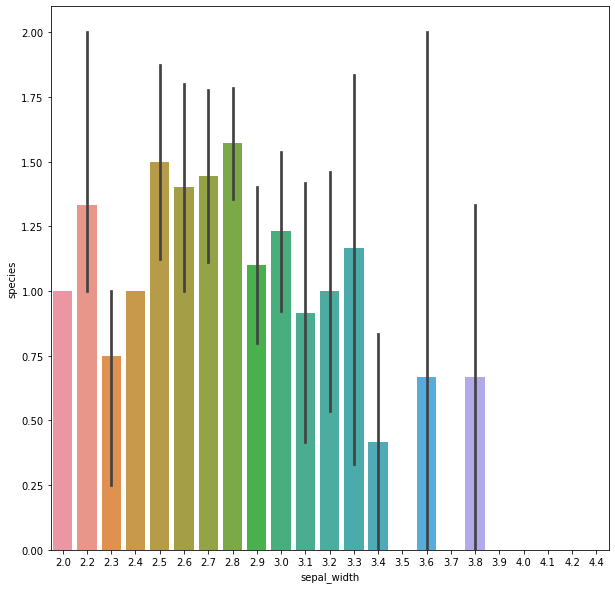

In [20]:
plot =plt.figure(figsize=(10,10))
sns.barplot(x='sepal_width',y='species',data=flower_dataset)

<AxesSubplot:>

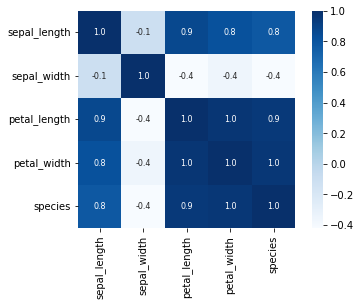

In [19]:
correlation = flower_dataset.corr()

sns.heatmap(correlation,cbar= True, square = True,fmt='.1f',annot= True, annot_kws= {'size': 8},cmap='Blues')

#Từ kết quả chốt được chọn sepal_length hoặc sepal_width để thực hiện classification -> mình chọn sepal width

Data Preprocessing

In [22]:
X=flower_dataset.drop('species',axis=1)
print(X)

Y=flower_dataset['species']
print(Y)


     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64


Train & Test Data

In [23]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)
print(Y.shape, Y_train.shape, Y_test.shape)

(150,) (120,) (30,)


Using Model Random Tree Classification

In [24]:
model=RandomForestClassifier()

model.fit(X_train.values,Y_train.values)

RandomForestClassifier()

In [25]:
#Calculate accuracy on test data
X_test_prediction =model.predict(X_test.values)
test_accuracy_score = accuracy_score(X_test_prediction,Y_test)
print(test_accuracy_score)   #-->93% means good accuracy    ->Thuật toán thu về được gần 97% rất tốt

0.9666666666666667


Build a Predictive System

In [31]:
input_data = (5.1,3.7,1.5,0.4)

input_data_np_asarray=np.asarray(input_data)

input_data_reshaped=input_data_np_asarray.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
#print(prediction)

if(prediction[0]==0):
    print("This is Iris-Setosa")
elif(prediction[0]==1):
    print("This is Iris-Versicolor")
else:
    print("This is Iris-Virginica")


This is Iris-Setosa
